## EXPERIMENT 3
Aumkar M Gadekar<br>
2017130023

### Aim : To implement cure algorithm

### Theory :

The cure algorithm is an advanced clustering algorithm used when mining large datasets, which cannot be processed all at ones. Smaller algorithms like K-Means work well on limited datasets.

CURE (no. of points,k)

Input : A set of points S

Output : k clusters

For every cluster u (each input point), in u.mean and u.rep store the mean of the points in the cluster and a set of c representative points of the cluster (initially c = 1 since each cluster has one data point). Also u.closest stores the cluster closest to u.<br>
All the input points are inserted into a k-d tree T <br>
Treat each input point as separate cluster, compute u.closest for each u and then insert each cluster into the heap Q. <br>(clusters are arranged in increasing order of distances between u and u.closest).<br>
While size (Q) > k <br>
Remove the top element of Q (say u) and merge it with its closest cluster u.closest (say v) and compute the new representative points for the merged cluster w. <br>
Remove u and v from T and Q. <br>
For all the clusters x in Q, update x.closest and relocate x <br>
insert w into Q <br>
repeat<br>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

### Load data

In [2]:
X= pd.read_csv('CC GENERAL.csv')
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Preprocess data

In [4]:
X = X.drop('CUST_ID', axis = 1) 
  
X.fillna(method ='ffill', inplace = True)

In [5]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  

X_normalized = normalize(X_scaled) 
  
X_normalized = pd.DataFrame(X_normalized) 

In [6]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [7]:
X=X_principal
X.shape

(8950, 2)

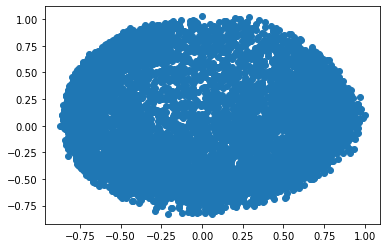

In [8]:
plt.scatter(X['P1'],X['P2'])

### Take one sample

In [50]:
X1=X[0:2200]
X1.shape

(2200, 2)

In [51]:
X1=np.array(X1)

#### Display sample

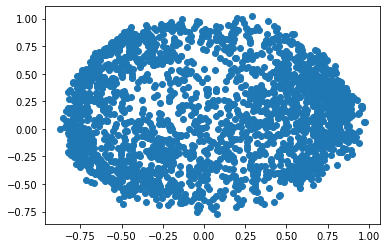

In [52]:
plt.scatter(X1[:,0],X1[:,1])

#### Cluster data

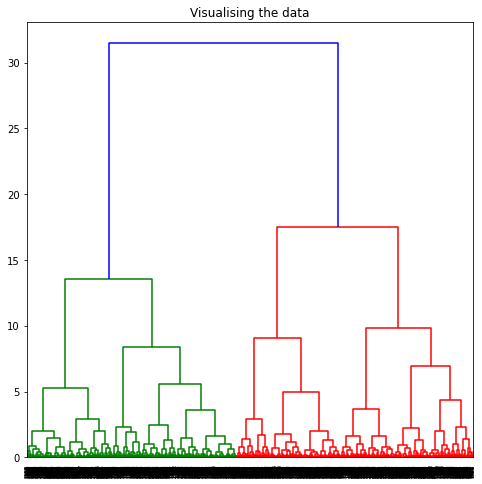

In [53]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X1, method ='ward')))

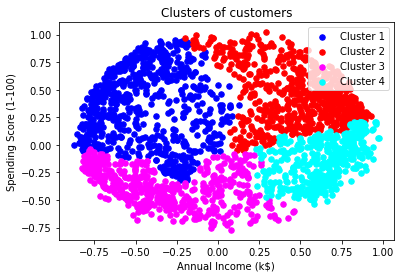

In [56]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)


plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 30, c = 'blue', label = 'Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 30, c = 'red', label = 'Cluster 2')
plt.scatter(X1[y_hc == 2, 0], X1[y_hc == 2, 1], s = 30, c = 'magenta', label = 'Cluster 3')
plt.scatter(X1[y_hc == 3, 0], X1[y_hc == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Clusters

In [81]:
clusters=[X1[y_hc==i] for i in range(4)] 

In [82]:
for i in clusters:
    print(i.shape)

(655, 2)
(612, 2)
(509, 2)
(424, 2)


[[360, 405, 90, 255], [349, 590, 209, 361], [434, 165, 19, 413], [153, 152, 249, 46]]


(-1.0, 1.0)

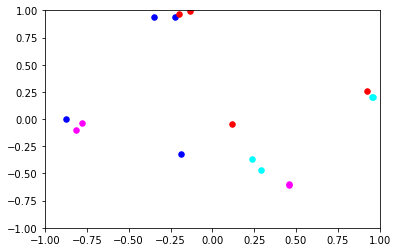

In [83]:
col=['blue','red','magenta','cyan']
lst=[]
for k in range(4):
    ls=[]
    c=clusters[k]
    pt=c.sum(axis=0)/len(c)
    dist=c-pt
    dist=np.square(dist).sum(axis=1)
    s1=sorted(range(len(dist)), key=lambda k: dist[k],reverse=True)[0]
    ls.append(s1)
    for j in range(3):
        dist=np.zeros(c.shape[0])
        for i in ls:
            pt=c[i]
            d=c-pt
            d=np.square(d).sum(axis=1)
            dist=dist+d
        s1=sorted(range(len(dist)), key=lambda k: dist[k],reverse=True)
        for z in s1:
            if(z not in ls):
                ls.append(z)
                break
    lst.append(ls)
    plt.scatter(c[ls, 0], c[ls, 1], s = 30, c = col[k], label = 'Cluster '+str(k+1))

print(lst)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

#### Shrink using section formulae

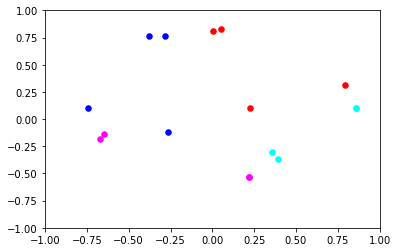

In [86]:
reps=[]
for k in range(4):
    c=clusters[k]
    pts=c[lst[k],:]
    cent=c.sum(axis=0)/len(c)
    t=[(7*i+3*cent)/10 for i in pts]
    t=np.array(t)
    reps.append(t)
    plt.scatter(t[:,0], t[:, 1], s = 30, c = col[k], label = 'Cluster '+str(k+1))
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

In [88]:
np.array(reps).shape

(4, 4, 2)

### Now, we scan through entire dataset and assign each point to the nearest cluster

In [97]:
X3=np.array(X)
X3.shape

(8950, 2)

In [121]:
import math
ans=[]
for i in X3:
    dmx=math.inf
    loc=0
    for j in range(4):
        m=max(np.square(reps[j]-i).sum(axis=1))
        dmx=min(dmx,m)
        if(dmx==m):
            loc=j
    ans.append(loc)
len(ans)

8950

In [123]:
ans=np.array(ans)
ans.shape

(8950,)

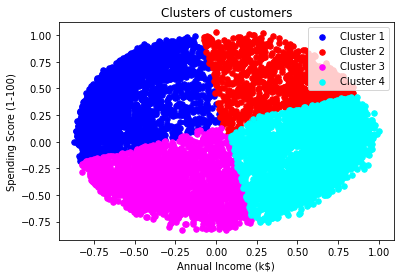

In [124]:
plt.scatter(X3[ans == 0, 0], X3[ans == 0, 1], s = 30, c = 'blue', label = 'Cluster 1')
plt.scatter(X3[ans == 1, 0], X3[ans == 1, 1], s = 30, c = 'red', label = 'Cluster 2')
plt.scatter(X3[ans == 2, 0], X3[ans == 2, 1], s = 30, c = 'magenta', label = 'Cluster 3')
plt.scatter(X3[ans == 3, 0], X3[ans == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Thus, the clustering has been extrapolated and performed for the entire dataset, using the representative points of the first sample.

### Conclusion : Thus cure algorithm has been understood and implemented.